# Assignment 1
Group 14 - Felix Buchert, Johann Jahner, Alexander Ladwein, Beike Lu, Alexander Schwer


## Task 1
### 1.1
For dimension $p = 1$, $X$ uniformly distributed in $C_1$, and $d \geq 1$:

\begin{align}
  Pr(X \in C_d) = q = 1
\end{align}

On the other hand, for $d < 1$ it holds:

\begin{align}
  Pr(X \in C_d) = q \in  [0,1)
\end{align}

In general, the probability $q$ can be calculated by integrating the PDF $f_X(x)$ over the interval $[-d/2, d/2]$:

\begin{align}
q = \int\limits_{-d/2}^{d/2} f(x)\,dx
\end{align}

Since $X$ is uniformly distributed in $C1$ corresponding to an interval length of $1$ (from $-1/2$ to $+1/2$), we obtain

\begin{align}
q = \int\limits_{-d/2}^{d/2} 1\,dx = [x]_{-d/2}^{d/2} = d.
\end{align}
For $p > 1$ solving the above integral results in $q=d^p$ and finally we obtain d:

\begin{align}
  q &= d^p \\
  ln\ q &= p\ \cdot ln\ d \\
  d &= q^{1/p}.
\end{align}

###1.2
For $p = 1$:
\begin{align}
Pr(||X^1||_{infinite} > 2.576) = 1-0.99 = 0.01.
\end{align}

For an arbitrary $p$: 
\begin{align}
Pr(||X^p||_{infinite} > 2.576) = 1-0.99^p
\end{align}

Now we can calculate $Pr(||X^p||_{infinite} > 2.576)$ for $p = 2,3,500$:

In [37]:
p = [2,3,500]
for element in p:
  Pr = 1-0.99**element
  print('For p = %d the probability is %f\n' %(element, Pr) )
  

For p = 2 the probability is 0.019900

For p = 3 the probability is 0.029701

For p = 500 the probability is 0.993430



## Task 2
(unfinished: analysis of angle matrix, and interpretation missing)


### 2.1 
$100$ uniformly distributed random vectors from the box $[−1, 1]^d$ for $d = 2$:

In [0]:
import numpy as np
# Get 100 vectors

vectors = np.random.uniform(-1,1,(100,2))

### 2.2
Average minimum angle of these 100 vectors:

In [37]:
import math
import numpy as np

def unit_vector(vector):
    # Returns the unit vector of a vector
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    # Returns the angle in radians between to vectors in any dimension
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    # clip prevents errors due to numerical inaccuracies
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

  
def normedDot(v1, v2):
    # Returns the normed scalar product between two vectors in any dimension
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    return np.dot(v1_u, v2_u)

def radToDeg(radAngle):
    # Convert a radian angle to a degree angle
    return radAngle * 180/math.pi
  
angle_matrix = np.zeros(shape=(100,100));

for i in range(0,100):
    for j in range(0,100):
        angle_matrix[i,j] = angle_between(vectors[i,:],vectors[j,:]);
        if i == j:
            angle_matrix[i,j] = math.nan # "penalty" value for angles between vector and itself
            
minAngle = np.nanmin(angle_matrix,0);
avgMinAngle = np.mean(minAngle);

print("The average minimum angle for this sample set is %f rad (%f deg)" %(avgMinAngle, radToDeg(avgMinAngle)))

The average minimum angle for this sample set is 0.030076 rad (1.723254 deg)


### 2.3
Functions to repeat the above for any dimension

In [0]:
import math
import numpy as np

debugFlg = 0

def symmetrize(a):
    # Get full symmetric matirx from triangular matrix. 
    # In our case diagonal elements can be ignored, since they are set to inf anyway
    return a + a.T

def avgMinAngleOfRandomVectors(dim = 2, numSamples = 100): 
    # INPUT
    # dim: dimensionality of vector space
    # numSamples: number of vectors to be sampled
    # 
    # OUTPUT
    # avgMinAngle: Average of the minimum angle of each vector with every other vector
    #
    # 
    
    # Get uniformly distributed vectors according to input parameters. 
    # Every row represents one vector.
    vectors = np.random.uniform(-1, 1, (numSamples, dim))
    
    
    # Create matrix to hold the calculated angles between each vector and every other vector:
    # angle_matrix[i,j] will contain the angle between vector i and j.
    angle_matrix = np.zeros(shape = (numSamples,numSamples))
    
    # Run through all vectors and compute angles.
    for i in range(0,numSamples):
        for j in range(0,numSamples):
            if j == i:
                # "penalty" value for angles between vector and itself
                angle_matrix[i,j] = math.nan 
                
            elif i < j:
                # Matrix will be symmetric, thus compute only upper triangular matrix
                angle_matrix[i,j] = angle_between(vectors[i,:],vectors[j,:])
            
    
    angle_matrix = symmetrize(angle_matrix)
    
    # Get minimum angle in eacht row of the matrix
    minAngle = np.nanmin(angle_matrix,0)
    
    # Calculate the mean of 
    avgMinAngle = np.mean(minAngle)
    
    if debugFlg:
        print("-----------------------Start------------------------")
        print("dim = %d; numSamples = %d\n" %(dim,numSamples))
        print(vectors)
        print("")
        print(angle_matrix)
        print("")
        print(minAngle)
        print("")
        print(avgMinAngle)
        print("------------------------End-------------------------\n")
    output = {'avgMinAnlge':avgMinAngle, 'angleMatrix':angle_matrix}
    return output
    

Compute average min angle for dimensions $d=1,...,1000$ and plot against dimension:

In [60]:
import matplotlib.pyplot as plt
import time

t = time.time()


dimRange = list(range(1,1001))
nDims = len(dimRange)
nSamples = 100

avgMinAngles = np.ones(shape=(nDims,1))
angleMatrices = np.ones(shape=(nDims,1))
#output = np.ones(shape=(nDims,1));
outputList = list()

for i in range(0, nDims):
    output = avgMinAngleOfRandomVectors(dimRange[i], nSamples)
    outputList.append(output)
    #(avgMinAngles[i], angleMatrices[i]) = avgMinAngleOfRandomVectors(dimRange[i], nSamples)
    #print('For dim = %d the average minimum angle is %f\n' %(dim, avgMinAngle) )

    

elapsed = time.time() - t

print("Elapsed time is %f seconds" %elapsed)

   

Elapsed time is 142.434525 seconds


In [0]:
# Analysis of output

radToDeg(outputList[50]['angleMatrix'])

minAngles = np.ones(shape=(nDims,nSamples))
maxAngles = np.ones(shape=(nDims,nSamples))
meanAngles = np.ones(shape=(nDims,nSamples))

for iDim in range(0,nDims):
  angleMatrix = outputList[iDim]['angleMatrix']
  minAngles[iDim,:] = np.nanmin(angleMatrix,0)
  maxAngles[iDim,:] = np.nanmax(angleMatrix,0)
  meanAngles[iDim,:] = np.nanmean(angleMatrix,0)




In [0]:
avgMinAngles = np.ones(shape=(nDims,1))
avgMaxAngles = np.ones(shape=(nDims,1))
avgMeanAngles = np.ones(shape=(nDims,1))

for iDim in range(0,nDims):
  avgMinAngles[iDim,0] = np.mean(minAngles[iDim,:])
  avgMaxAngles[iDim,0] = np.mean(maxAngles[iDim,:])
  avgMeanAngles[iDim,0] = np.mean(meanAngles[iDim,:])

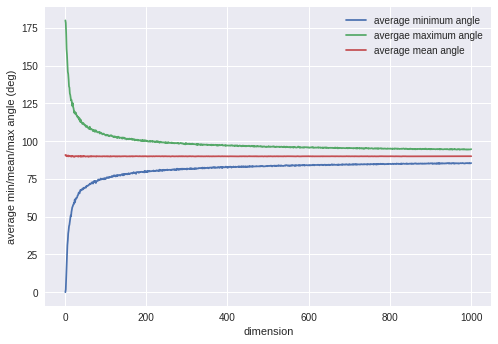

In [63]:
avgMinAngles_deg = radToDeg(avgMinAngles)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

LineMin = plt.plot(dimRange, avgMinAngles_deg, label = 'average minimum angle');
plt.xlabel('dimension');
plt.ylabel('average minimum angle (deg)');

avgMaxAngles_deg = radToDeg(avgMaxAngles)

LineMax = plt.plot(dimRange, avgMaxAngles_deg, label = 'avergae maximum angle');
plt.xlabel('dimension');
plt.ylabel('average maximum angle (deg)');

avgMeanAngles_deg = radToDeg(avgMeanAngles)

LineMean = plt.plot(dimRange, avgMeanAngles_deg, label = 'average mean angle');
plt.xlabel('dimension');
plt.ylabel('average min/mean/max angle (deg)');

plt.legend()

#print(np.max(avgMinAngles_deg), min(dimRange), avgMinAngles_deg[0], max(dimRange), avgMinAngles_deg[-1])

In [0]:
outputList400 = outputList


### 2.4 Interpretation
- We think, the above experiment is equivalent to drawing pairs of randomly sampled vectors from d-dimensional spaces
- The result suggests, that when repeatedly (a high number of times) looking at the angle between two random vectors in a d-dimensional space, on average the vectors will be orthogonal, independet of the dimension. However, the higher the dimension the smaller the variance in the distribution of the angles will be.
- The experiment shows the characteristics of the law of large numbers: "According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed" (Wikipedia)
- Concslusion for 2 vectors: The higher the dimension the more probable it is, that two randomly sampled vectors will be nearly orthogonal (see above)

In [0]:
dimRange = list(range(2,1001))
nDims = len(dimRange)
nVectorPairs = 10000

angles = np.zeros((nDims, nVectorPairs))

for i in range(0,nDims):
  # draw two vectos
  for j in range(0,nVectorPairs):
    vectorPair = np.random.uniform(-1, 1, (2, dimRange[i]))
    angles[i,j] = normedDot(vectorPair[0,:],vectorPair[1,:])
  
  

plt.plot(dimRange,radToDeg(np.mean(angles,1)))
  

(array([23., 21., 41., 46., 59., 59., 43., 69., 68., 75., 66., 65., 54.,
        55., 58., 53., 42., 45., 33., 25.]),
 array([-9.93757482e-01, -8.94398381e-01, -7.95039281e-01, -6.95680180e-01,
        -5.96321079e-01, -4.96961978e-01, -3.97602878e-01, -2.98243777e-01,
        -1.98884676e-01, -9.95255756e-02, -1.66474932e-04,  9.91926258e-02,
         1.98551726e-01,  2.97910827e-01,  3.97269928e-01,  4.96629029e-01,
         5.95988129e-01,  6.95347230e-01,  7.94706331e-01,  8.94065431e-01,
         9.93424532e-01]),
 <a list of 20 Patch objects>)

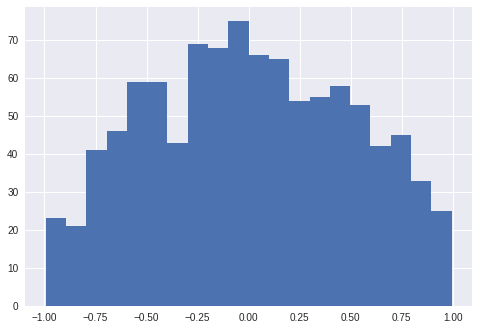

In [54]:
plt.hist(angles[2,:],bins = 20)

(array([  1.,   2.,   5.,  10.,   8.,  39.,  57.,  67.,  95., 121., 115.,
        137., 118.,  92.,  51.,  41.,  13.,  14.,  13.,   1.]),
 array([-0.10792672, -0.09785392, -0.08778111, -0.07770831, -0.06763551,
        -0.0575627 , -0.0474899 , -0.0374171 , -0.02734429, -0.01727149,
        -0.00719869,  0.00287412,  0.01294692,  0.02301972,  0.03309253,
         0.04316533,  0.05323813,  0.06331094,  0.07338374,  0.08345655,
         0.09352935]),
 <a list of 20 Patch objects>)

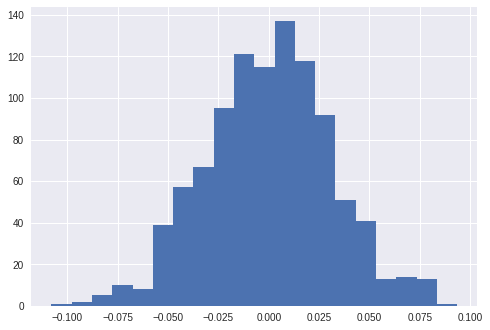

In [55]:
plt.hist(angles[998,:], bins=20)

### 2.5
- The general trend of the data does not change, however the "noise"/variance decreases, the curves become smoother
- The higher the sample size, the more probable it is, that there is a smaller minimum angle between every vector and the other vectors. Thus the average of this minimum also decreases with increasing number of samples

##Task 3 
###3.1

All the probabilities add up to 1$\rightarrow$ It is a probability table.

###3.2

The conditional expectation is written as:
\begin{align}
E_{y|x=2}[y] = \sum_{y} y\cdot p_{y|x=2}(y)\\\\
\end{align}

Therefore, from the figure we know:

\begin{align}
p_x(2)= 0.4+0.14+0.05=0.59
\end{align}

We divide in followed cases:

   \begin{align}
   f(x) =
   \begin{cases}
     \frac{p_{yx}(1,2)}{p_x(2)}=\frac{0.4}{0.59}  \\
     \frac{p_{yx}(2,2)}{p_x(2)}=\frac{0.14}{0.59}  \\
     \frac{p_{yx}(3,2)}{p_x(2)}=\frac{0.05}{0.59} 
   \end{cases}
  \end{align}
  
The conditional expectation:
  
   \begin{align}
   E_{y|x=2}[y] = 1\cdot \frac{0.4}{0.59} + 2\cdot \frac{0.14}{0.59} + 3 \cdot \frac{0.05}{0.59} = 1.407
   \end{align}

For the event X=1 and Y=3
   \begin{align}
   p(x=1,y=3)=\frac{p_{x,y}(1,3)}{\sum_{x}p_{x,y}(x,3)}=\frac{0.13}{0.13+0.05} = 0.72
   \end{align}

###3.3
Intergrate p(x,y)
   
   \begin{align}
   \int_{0}^{0.5}\int_{0}^{1} 1 dxdy = 1 \cdot 0.5 = 0.5 
   \end{align}
   $\rightarrow$  not a joint density function, because 0.5 is not equal to 1
   
###3.4
   For $p_x(x)$
   
   \begin{align}
     p_x(x)= \int_{y} p_{xy}(x,y) dy = \int_{x}^{\infty}2\cdot exp(-x-y) dy = 2 \cdot e^{-x}\cdot e^{-x} =
      \begin{cases}
      2 \cdot e^{-2x}   & 0\leq x \leq y  \\
      0   &otherwise \\
\end{cases} 
   \end{align}

   For $p_y(y)$
   \begin{align}
   p_y(y)= \int_{x} p_{xy}(x,y) dx = \int_{0}^{y}2\cdot exp(-x-y) dx =
      \begin{cases}
      2 \cdot e^{-y} \cdot (1-e^{-y})   & y \geq 0 \\
      0   & otherwise \\
\end{cases}
   \end{align}

###3.5
The probability for $X\leq2$ and $Y=0.5$

\begin{align}
  p(x\leq 2|y=0.5) = \int_{0}^{2} \frac{1}{15} \cdot (2x+2) dx = \frac{8}{15}
\end{align}




## Task 4

The covariance matrix $\textbf{C}\in\mathbb{R}^{p\times p}$ of any random vector $\textbf{X}\in\mathbb{R}^{p}$ is given by:

\begin{align}
\textbf{C} = \mathbb{E}[(\textbf{X} - \mathbb{E}[\textbf{X}])(\textbf{X} - \mathbb{E}[\textbf{X}])^T]\\\\
\end{align}

First, we show the symmetry of the covariance matrix $\textbf{C}$, i.e $\textbf{C} = \textbf{C}^T$ :

\begin{align}
\textbf{C}^T &= (\mathbb{E}[(\textbf{X} - \mathbb{E}[\textbf{X}])(\textbf{X} - \mathbb{E}[\textbf{X}])^T])^T \\ &= \mathbb{E}[((\textbf{X} - \mathbb{E}[\textbf{X}])(\textbf{X} - \mathbb{E}[\textbf{X}])^T]))^T] \\ &= \mathbb{E}[((\textbf{X} - \mathbb{E}[\textbf{X}])^T)^T(\textbf{X} - \mathbb{E}[\textbf{X}])^T] \\ &= \mathbb{E}[(\textbf{X} - \mathbb{E}[\textbf{X}])(\textbf{X} - \mathbb{E}[\textbf{X}])^T] = \textbf{C} \\\\
\end{align}



Second, we show that the covariance matrix $\textbf{C}$ of any random vector $\textbf{X}\in\mathbb{R}^{p}$ is positive-semidefinite, i.e  $\textbf{u}^T\textbf{C}\textbf{u} \geq 0$  for any covariance matrix $\textbf{C}\in\mathbb{R}^{p\times p}$ and any $\textbf{u}\in\mathbb{R}^{p}$

\begin{align}
\textbf{u}^T\textbf{C}\textbf{u} &= \textbf{u}^T \mathbb{E}[(\textbf{X} - \mathbb{E}[\textbf{X}])(\textbf{X} - \mathbb{E}[\textbf{X}])^T] \textbf{u}\\ &= \mathbb{E}[\textbf{u}^T(\textbf{X} - \mathbb{E}[\textbf{X}])(\textbf{X} - \mathbb{E}[\textbf{X}])^T\textbf{u}] \\ &= \mathbb{E}[((\textbf{X} - \mathbb{E}[\textbf{X}])^T\textbf{u})^T(\textbf{X} - \mathbb{E}[\textbf{X}])^T\textbf{u}] \\ &= \mathbb{E}[((\textbf{X} - \mathbb{E}[\textbf{X}])^T\textbf{u})^2] \geq 0
\end{align}

This holds as the square of any real number ( $(\textbf{X} - \mathbb{E}[\textbf{X}])^T\textbf{u}$ is a real scalar number) is non-negative.

From the two previously shown properties, it follows that the covariance matrix $\textbf{C}\in\mathbb{R}^{p\times p}$ of any random vector $\textbf{X}\in\mathbb{R}^{p}$ is symmetric positive-semidefinite.
